In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [6]:
df.Alley = df.Alley.replace(np.nan,'NA')

In [7]:
df.Alley.value_counts()

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
for col in df.columns:
    if df[col].isnull().sum() >0:
        print(col,' ',df[col].isnull().sum())

LotFrontage   259
MasVnrType   8
MasVnrArea   8
BsmtQual   37
BsmtCond   37
BsmtExposure   38
BsmtFinType1   37
BsmtFinType2   38
Electrical   1
FireplaceQu   690
GarageType   81
GarageYrBlt   81
GarageFinish   81
GarageQual   81
GarageCond   81
PoolQC   1453
Fence   1179
MiscFeature   1406


In [10]:
df = df.drop(columns = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])

[]

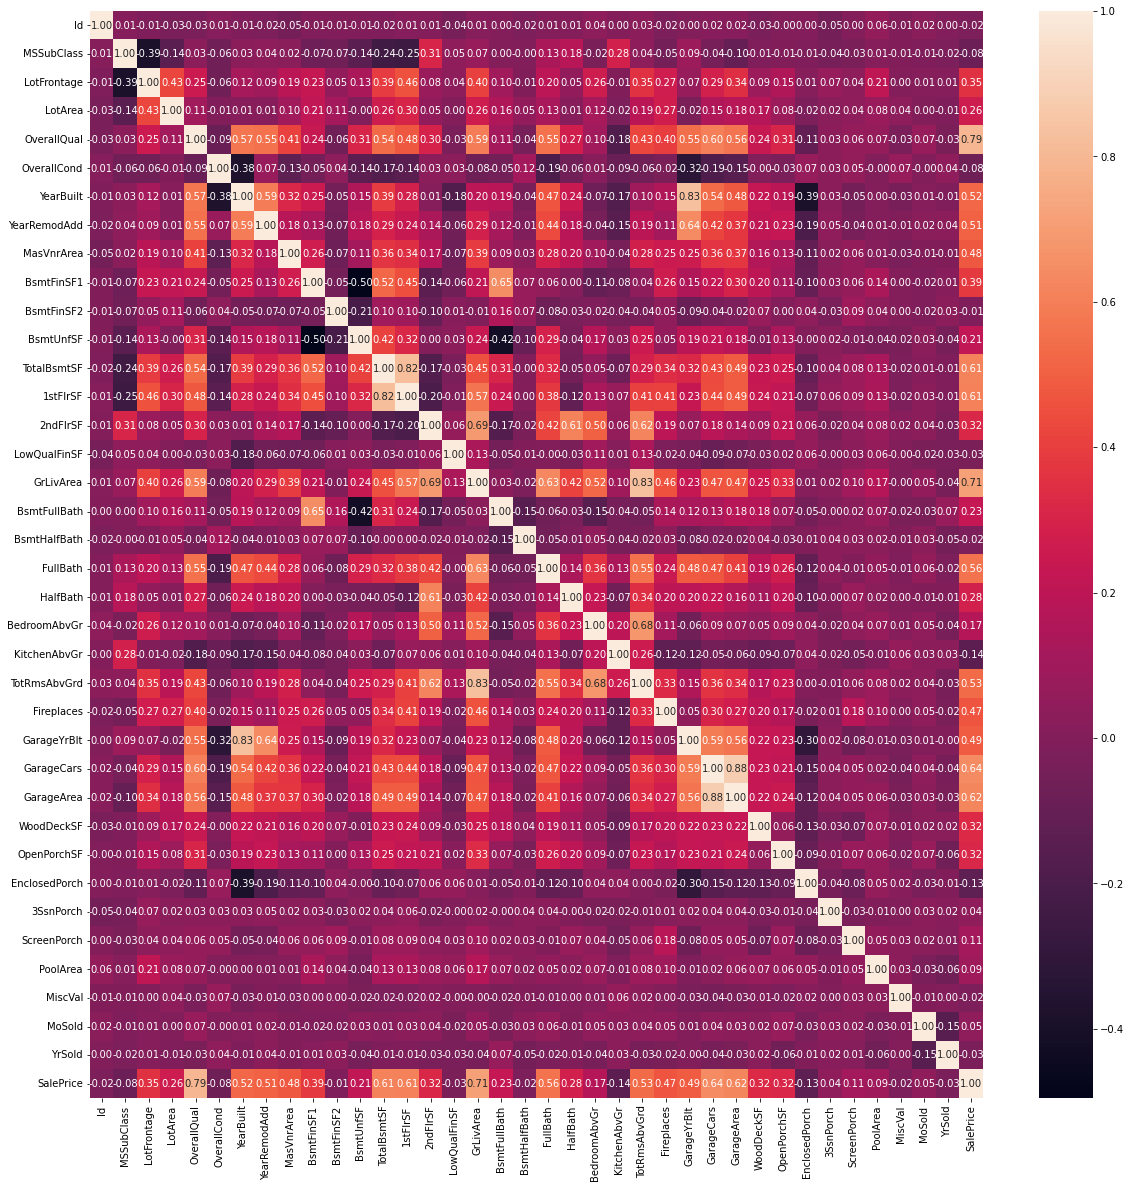

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot =True,fmt='.2f')
plt.plot()

In [12]:
df.corrwith(df['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float

In [13]:
cols = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','LotArea','KitchenQual']
cols

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'LotArea',
 'KitchenQual']

In [14]:
df[cols].shape

(1460, 12)

<AxesSubplot:>

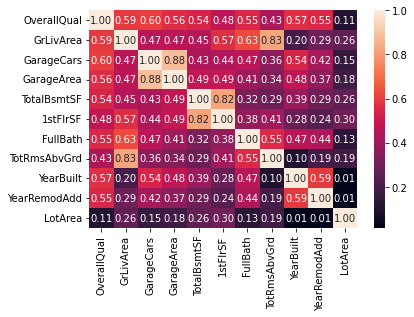

In [15]:
sns.heatmap(df[cols].corr(),annot=True,fmt='.2f')

In [16]:
correlated = ['TotRmsAbvGrd','GarageCars','YearBuilt']
cols= list(set(cols) - set(correlated))

In [18]:
cols.extend(['MSZoning','OverallCond','LotShape','Utilities'])

In [19]:
len(cols)

17

In [20]:
cols

['FullBath',
 'TotalBsmtSF',
 'GarageArea',
 '1stFlrSF',
 'OverallQual',
 'LotArea',
 'YearRemodAdd',
 'GrLivArea',
 'KitchenQual',
 'MSZoning',
 'OverallCond',
 'LotShape',
 'Utilities',
 'MSZoning',
 'OverallCond',
 'LotShape',
 'Utilities']

In [21]:
cols = cols[:-4]
len(cols)

13

In [22]:
df[cols].shape

(1460, 13)

<AxesSubplot:>

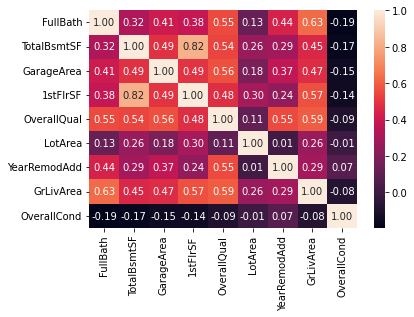

In [23]:
sns.heatmap(df[cols].corr(),annot=True,fmt='.2f')

In [24]:
cols.remove('1stFlrSF')

In [25]:
cols.append('SalePrice')
cols

['FullBath',
 'TotalBsmtSF',
 'GarageArea',
 'OverallQual',
 'LotArea',
 'YearRemodAdd',
 'GrLivArea',
 'KitchenQual',
 'MSZoning',
 'OverallCond',
 'LotShape',
 'Utilities',
 'SalePrice']

In [26]:
df_new = df[cols].copy()
df_new.shape

(1460, 13)

In [27]:
df_new.isnull().sum()

FullBath        0
TotalBsmtSF     0
GarageArea      0
OverallQual     0
LotArea         0
YearRemodAdd    0
GrLivArea       0
KitchenQual     0
MSZoning        0
OverallCond     0
LotShape        0
Utilities       0
SalePrice       0
dtype: int64

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FullBath      1460 non-null   int64 
 1   TotalBsmtSF   1460 non-null   int64 
 2   GarageArea    1460 non-null   int64 
 3   OverallQual   1460 non-null   int64 
 4   LotArea       1460 non-null   int64 
 5   YearRemodAdd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   KitchenQual   1460 non-null   object
 8   MSZoning      1460 non-null   object
 9   OverallCond   1460 non-null   int64 
 10  LotShape      1460 non-null   object
 11  Utilities     1460 non-null   object
 12  SalePrice     1460 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 148.4+ KB


In [29]:
df_new.describe()

,FullBath,TotalBsmtSF,GarageArea,OverallQual,LotArea,YearRemodAdd,GrLivArea,OverallCond,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.565068,1057.429452,472.980137,6.099315,10516.828082,1984.865753,1515.463699,5.575342,180921.195890
std,0.550916,438.705324,213.804841,1.382997,9981.264932,20.645407,525.480383,1.112799,79442.502883
min,0.000000,0.000000,0.000000,1.000000,1300.000000,1950.000000,334.000000,1.000000,34900.000000
25%,1.000000,795.750000,334.500000,5.000000,7553.500000,1967.000000,1129.500000,5.000000,129975.000000
50%,2.000000,991.500000,480.000000,6.000000,9478.500000,1994.000000,1464.000000,5.000000,163000.000000
75%,2.000000,1298.250000,576.000000,7.000000,11601.500000,2004.000000,1776.750000,6.000000,214000.000000
max,3.000000,6110.000000,1418.000000,10.000000,215245.000000,2010.000000,5642.000000,9.000000,755000.000000


In [30]:
df_new.nunique()

FullBath           4
TotalBsmtSF      721
GarageArea       441
OverallQual       10
LotArea         1073
YearRemodAdd      61
GrLivArea        861
KitchenQual        4
MSZoning           5
OverallCond        9
LotShape           4
Utilities          2
SalePrice        663
dtype: int64

c:\Users\harsh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

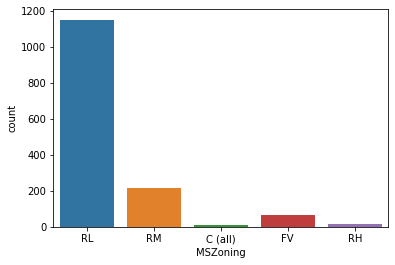

In [33]:
sns.countplot(df_new['MSZoning'])

c:\Users\harsh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotShape', ylabel='count'>

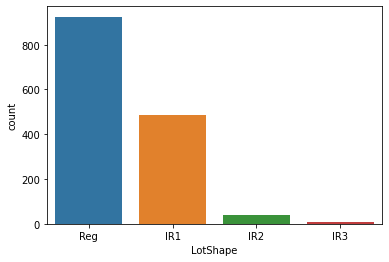

In [35]:
sns.countplot(df_new['LotShape'])

In [37]:
df_price_by_qual = df_new.groupby('OverallQual')['SalePrice'].mean().reset_index()

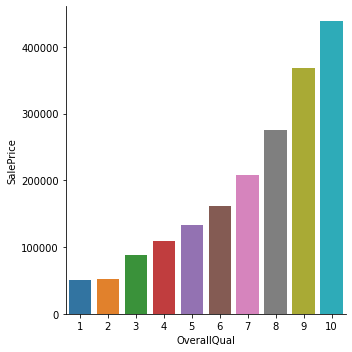

In [40]:
sns.catplot(x ='OverallQual',y='SalePrice',data=df_price_by_qual,kind='bar')

In [41]:
df_new.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [42]:
df_new.drop(columns=['Utilities'],inplace=True)

In [43]:
cat_columns = [col for col in df_new.select_dtypes('object')]
num_columns = list(set(df_new.columns)-set(cat_columns))

In [44]:
df_new[cat_columns].nunique()

KitchenQual    4
MSZoning       5
LotShape       4
dtype: int64

In [45]:
df_new.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [46]:
df_new.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [47]:
# LabelEncoding
df_new.KitchenQual = df_new.KitchenQual.replace(['Ex','Gd','TA','Fa'],[4,3,2,1])
df_new.LotShape = df_new.LotShape.replace(['Reg','IR1','IR2','IR3'],[4,3,2,1])

In [49]:
df_new.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [51]:
df_price_by_zone = df_new.groupby('MSZoning')['SalePrice'].mean().reset_index()
df_price_by_zone

,MSZoning,SalePrice
0,C (all),74528.000000
1,FV,214014.061538
2,RH,131558.375000
3,RL,191004.994787
4,RM,126316.830275


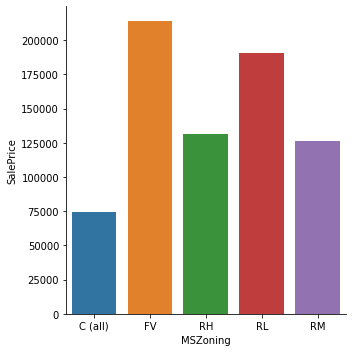

In [53]:
sns.catplot(x='MSZoning',y='SalePrice',data=df_price_by_zone,kind='bar')

In [54]:
df_new.MSZoning = df_new.MSZoning.replace(['FV','RH','RM','RL',],[5,4,3,2])

In [59]:
df_new.MSZoning = df_new.MSZoning.replace('C (all)',1)

In [60]:
x_cols = [col for col in df_new.columns if col !='SalePrice']
X = df_new[x_cols]
y = df_new['SalePrice']

In [61]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [62]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

models={
    'LR':LinearRegression(),
    'Ri':Ridge(),
    'La':Lasso()
}

In [63]:
from sklearn.metrics import mean_absolute_error

adj_r2= {}
mse={}

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    adj_r2[name] = round(model.score(x_test,y_test),3)
    mse[name] = mean_absolute_error(y_test,y_pred)

In [64]:
adj_r2

{'LR': 0.64, 'Ri': 0.64, 'La': 0.64}

In [65]:
mse

{'LR': 26226.652465743082, 'Ri': 26221.006870782687, 'La': 26226.044999929367}